# 📌 **Extracão**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 **Transformação**

In [ ]:
print(" Nome das colunas:")
print(df.columns)

print("\n Tipos de dados:")
print(df.dtypes)

print("\n Informações gerais sobre o DataFrame:")
df.info()

print("\n Amostra dos dados:")
df.head()


 Nome das colunas:
Index(['customerID', 'Churn', 'Evasao', 'customer.gender',
       'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
       'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

 Tipos de dados:
customerID                    object
Churn                         object
Evasao                         int64
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.Int

,customerID,Churn,Evasao,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,0,Female,0,Yes,Yes,9,Yes,No,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,0,Male,0,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,1,Male,0,No,No,4,Yes,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,1,Male,1,Yes,No,13,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,1,Female,1,Yes,No,3,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
# Filtrar somente valores 'Yes' ou 'No' em Churn
df = df[df['Churn'].isin(['Yes', 'No'])].copy()

 # Criar coluna binária de Evasão (Yes=1, No=0)
df['Evasao'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\n Após limpeza:")
print(df['Evasao'].value_counts())



 Após limpeza:
Evasao
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
df_clean = df.copy()

# Renomear colunas com base no dicionário de dados e nomes reais do JSON
df_clean = df_clean.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasao_String',
    'Evasao': 'Evasao',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'Possui_Conjuge',
    'customer.Dependents': 'Possui_Dependentes',
    'customer.tenure': 'Tempo_Contrato',
    'phone.PhoneService': 'Telefone_Ativo',
    'phone.MultipleLines': 'Multiplas_Linhas',
    'internet.InternetService': 'Tipo_Internet',
    'internet.OnlineSecurity': 'Seguranca_Online',
    'internet.OnlineBackup': 'Backup_Online',
    'internet.DeviceProtection': 'Protecao_Dispositivo',
    'internet.TechSupport': 'Suporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Filmes',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Fatura_Papel',
    'account.PaymentMethod': 'Metodo_Pagamento',
    'account.Charges.Monthly': 'Fatura_Mensal',
    'account.Charges.Total': 'Fatura_Total'
})




# Visualizar amostra
df_clean.head()


,ID_Cliente,Evasao_String,Evasao,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Tempo_Contrato,Telefone_Ativo,Multiplas_Linhas,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Fatura_Mensal,Fatura_Total
0,0002-ORFBO,No,0,Female,0,Yes,Yes,9,Yes,No,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,0,Male,0,No,No,9,Yes,Yes,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,1,Male,0,No,No,4,Yes,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,1,Male,1,Yes,No,13,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,1,Female,1,Yes,No,3,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
print(" Distribuição original de Churn:")
print(df['Churn'].value_counts(dropna=False))

# Limpar valores diferentes de 'Yes' e 'No'
df = df[df['Churn'].isin(['Yes', 'No'])].copy()

# Criar nova coluna numérica
df['Evasao'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("\n Após limpeza:")
print(df['Evasao'].value_counts())


 Distribuição original de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

 Após limpeza:
Evasao
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# Colunas binárias
colunas_binarias = ['Possui_Conjuge', 'Possui_Dependentes', 'Telefone_Ativo', 'Fatura_Papel', 'Idoso']

# Colunas multivalor
colunas_multivalor = ['Multiplas_Linhas', 'Seguranca_Online', 'Backup_Online',
                      'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes']

#  Padronizar valores para evitar NaN (remove espaços e capitaliza)
for coluna in colunas_binarias + colunas_multivalor:
    if coluna in df_clean.columns:
        df_clean[coluna] = df_clean[coluna].astype(str).str.strip().str.title()

#  Mapear colunas binárias
for coluna in colunas_binarias:
    if coluna in df_clean.columns:
        df_clean[coluna] = df_clean[coluna].map({
            'Yes': 1, 'No': 0,
            '1': 1, '0': 0,
            1: 1, 0: 0
        }).fillna(0)

#  Mapear colunas multivalor
for coluna in colunas_multivalor:
    if coluna in df_clean.columns:
        df_clean[coluna] = df_clean[coluna].replace(
            {'No Phone Service': 'No', 'No Internet Service': 'No'}
        ).map({'Yes': 1, 'No': 0}).fillna(0)

# Mostrar resultado final (opcional)
print("\n DataFrame convertido para binário:")
print(df_clean[colunas_binarias + colunas_multivalor].head(10))



 DataFrame convertido para binário:
   Possui_Conjuge  Possui_Dependentes  Telefone_Ativo  Fatura_Papel  Idoso  \
0               1                   1               1             1      0   
1               0                   0               1             0      0   
2               0                   0               1             1      0   
3               1                   0               1             1      1   
4               1                   0               1             1      1   
5               0                   1               1             1      0   
6               1                   0               1             1      1   
7               1                   0               1             1      0   
8               0                   0               1             1      1   
9               1                   1               1             1      0   

   Multiplas_Linhas  Seguranca_Online  Backup_Online  Protecao_Dispositivo  \
0               0.0       

# 📊**Carga e análise**

In [ ]:
# 📊 Estatísticas descritivas para variáveis numéricas
print("📌 Estatísticas descritivas (variáveis numéricas):")
print(df_clean.describe().T)

# 📌 Mediana separada (não vem por padrão no describe())
print("\n📌 Mediana das variáveis numéricas:")
print(df_clean.median(numeric_only=True))

# 📌 Contagem de valores únicos por coluna
print("\n📌 Valores únicos por coluna:")
print(df_clean.nunique())

# 📌 Distribuição da variável alvo Evasao
print("\n📌 Distribuição da variável alvo (Evasao):")
print(df_clean['Evasao'].value_counts(normalize=True).map(lambda x: f"{x*100:.2f}%"))

# 📌 Taxa geral de evasão
taxa_evasao = df_clean['Evasao'].mean() * 100
print(f"\n📌 Taxa geral de evasão: {taxa_evasao:.2f}%")


📌 Estatísticas descritivas (variáveis numéricas):
                       count         mean          std    min     25%  \
Evasao                7043.0     0.265370     0.441561   0.00    0.00   
Idoso                 7043.0     0.162147     0.368612   0.00    0.00   
Possui_Conjuge        7043.0     0.483033     0.499748   0.00    0.00   
Possui_Dependentes    7043.0     0.299588     0.458110   0.00    0.00   
Tempo_Contrato        7043.0    32.371149    24.559481   0.00    9.00   
Telefone_Ativo        7043.0     0.903166     0.295752   0.00    1.00   
Multiplas_Linhas      7043.0     0.000000     0.000000   0.00    0.00   
Seguranca_Online      7043.0     0.000000     0.000000   0.00    0.00   
Backup_Online         7043.0     0.000000     0.000000   0.00    0.00   
Protecao_Dispositivo  7043.0     0.000000     0.000000   0.00    0.00   
Suporte_Tecnico       7043.0     0.000000     0.000000   0.00    0.00   
Streaming_TV          7043.0     0.000000     0.000000   0.00    0.00   
S

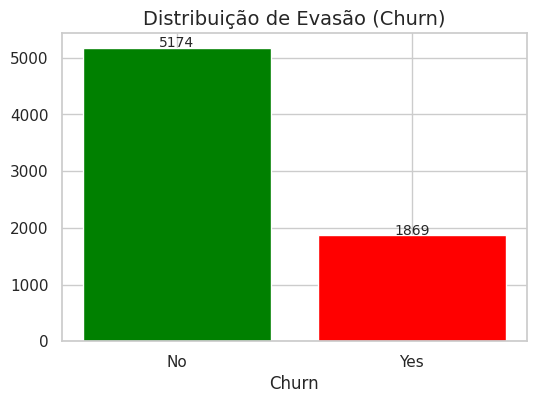

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values,
        color=[color_map.get(label, 'gray') for label in churn_counts.index])
plt.title('Distribuição de Evasão (Churn)', fontsize=14)
plt.xlabel('Churn', fontsize=12)
for i, v in enumerate(churn_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontsize=10)
plt.show()


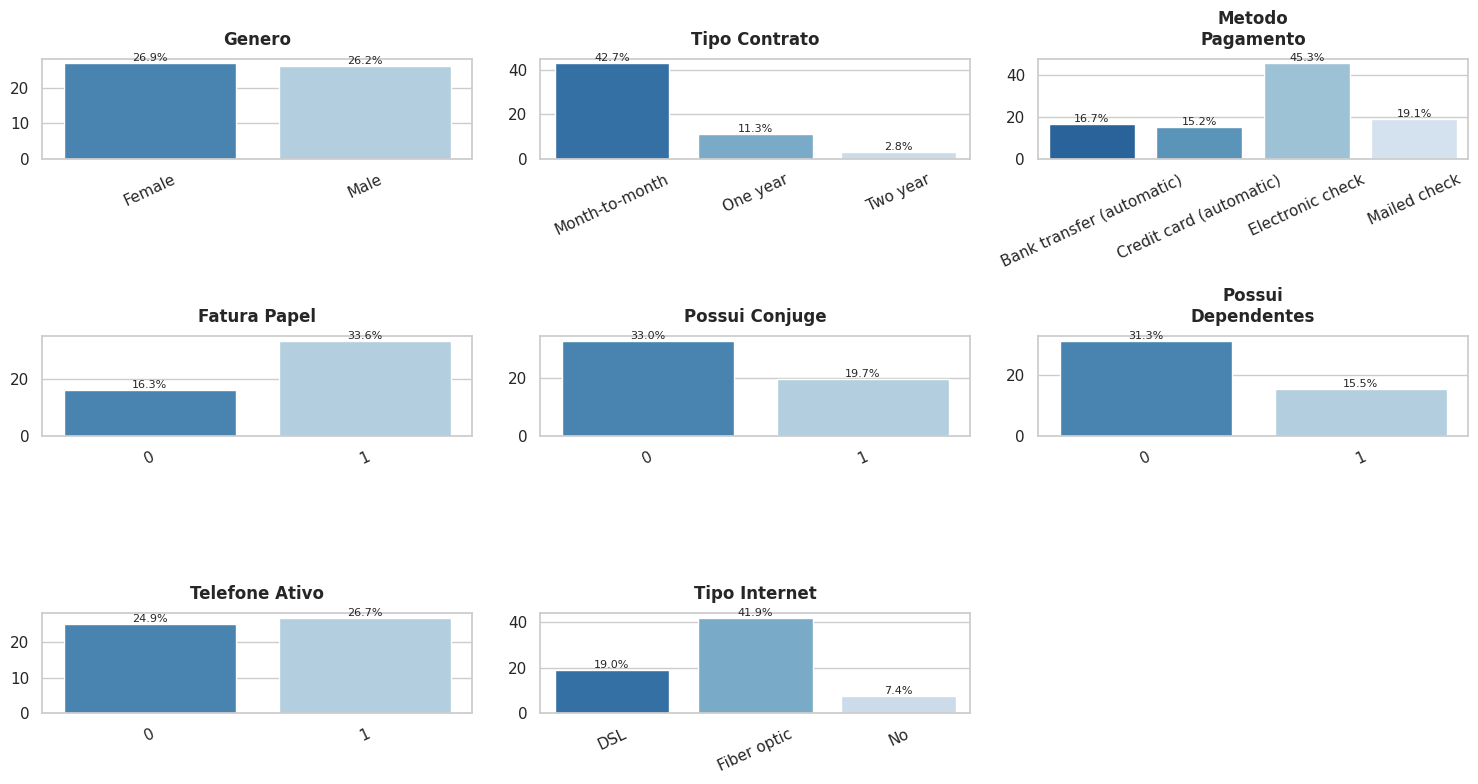

In [ ]:
import math
import textwrap

# Lista de variáveis categóricas (sem 'Multiplas_Linhas')
variaveis_categoricas = [
    'Genero', 'Tipo_Contrato', 'Metodo_Pagamento',
    'Fatura_Papel', 'Possui_Conjuge', 'Possui_Dependentes',
    'Telefone_Ativo', 'Tipo_Internet'
]

# Número de linhas e colunas
n_cols = 3
n_rows = math.ceil(len(variaveis_categoricas) / n_cols)

sns.set_theme(style="whitegrid")

# Criar figura
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()

# Índice para controle de gráficos
plot_index = 0

for var in variaveis_categoricas:
    if var in df_clean.columns:
        # Calcular taxa de evasão
        taxa = df_clean.groupby(var)['Evasao'].mean().reset_index()
        taxa['Evasao'] = taxa['Evasao'] * 100

        ax = sns.barplot(
            data=taxa,
            x=var,
            y='Evasao',
            hue=var,
            dodge=False,
            palette='Blues_r',
            legend=False,
            ax=axes[plot_index]
        )

        # Adicionar rótulos de porcentagem
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}%",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8)

        # Centralizar e quebrar título se necessário
        titulo_formatado = "\n".join(textwrap.wrap(var.replace("_", " "), width=15))
        ax.set_title(titulo_formatado, fontsize=12, weight='bold', pad=10)

        # Ajustes visuais
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.tick_params(axis='x', rotation=25)

        plot_index += 1

# Remover gráficos extras (em branco)
for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

# Ajustar espaçamento
plt.tight_layout()
plt.show()


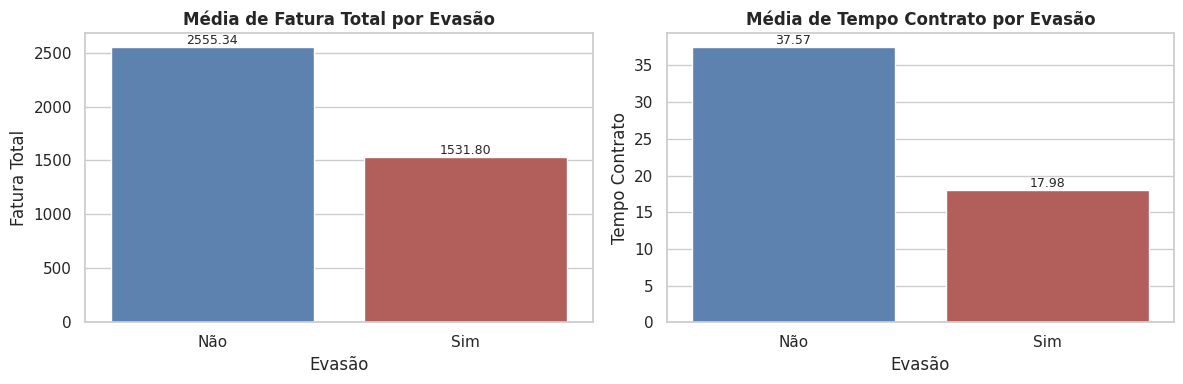

In [ ]:
# Lista de variáveis numéricas relevantes
variaveis_numericas = ['Fatura_Total', 'Tempo_Contrato']

sns.set_theme(style="whitegrid")

# Criar painel de gráficos
fig, axes = plt.subplots(1, len(variaveis_numericas), figsize=(12, 4))

for i, var in enumerate(variaveis_numericas):
    if var in df_clean.columns:
        # Calcular média por evasão
        media_por_evasao = df_clean.groupby('Evasao')[var].mean().reset_index()

        # Criar gráfico de barras limpo
        sns.barplot(
            data=media_por_evasao,
            x='Evasao',
            y=var,
            hue='Evasao',
            dodge=False,
            palette=['#4F81BD', '#C0504D'],
            legend=False,
            ax=axes[i]
        )

        # Ajustar rótulos do eixo X diretamente sem gerar warning
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Não', 'Sim'])

        # Adicionar valores acima das barras
        for p in axes[i].patches:
            axes[i].annotate(f"{p.get_height():.2f}",
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='bottom', fontsize=9)

        # Título e ajustes visuais
        axes[i].set_title(f"Média de {var.replace('_', ' ')} por Evasão", fontsize=12, weight='bold')
        axes[i].set_xlabel("Evasão")
        axes[i].set_ylabel(var.replace('_', ' '))

# Ajustar layout
plt.tight_layout()
plt.show()


# 📌 Relatório final


# 📊 Relatório de Análise de Evasão de Clientes (Churn)

O objetivo desta análise foi investigar o problema de **evasão de clientes** (*Churn*) em uma empresa de telecomunicações.  
O *Churn* representa a porcentagem de clientes que cancelam seus serviços em determinado período.  
Identificar os padrões e variáveis mais associadas à evasão é essencial para implementar **estratégias de retenção** e reduzir a perda de receita.

---
## 1. Limpeza e Tratamento de Dados
As etapas de preparação incluíram:

- **Importação** dos dados em formato JSON.
- **Remoção** de valores inconsistentes na variável-alvo `Churn` (mantendo apenas 'Yes' e 'No').
- **Criação** de uma coluna numérica `Evasao` (1 para clientes que cancelaram, 0 para clientes que permaneceram).
- **Renomeação** das colunas para nomes mais claros, alinhados ao dicionário de dados.
- **Conversão** de colunas categóricas binárias e multivalor em formato numérico (0/1).
- **Padronização** de valores para evitar `NaN` e inconsistências.

---
## 2. Análise Exploratória de Dados
Nesta etapa, buscamos identificar padrões e fatores que influenciam a evasão.


**Taxa geral de evasão:** 26.54% dos clientes.

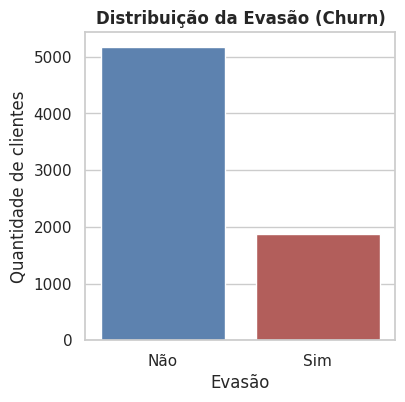

### 2.2 Evasão por Variáveis Categóricas

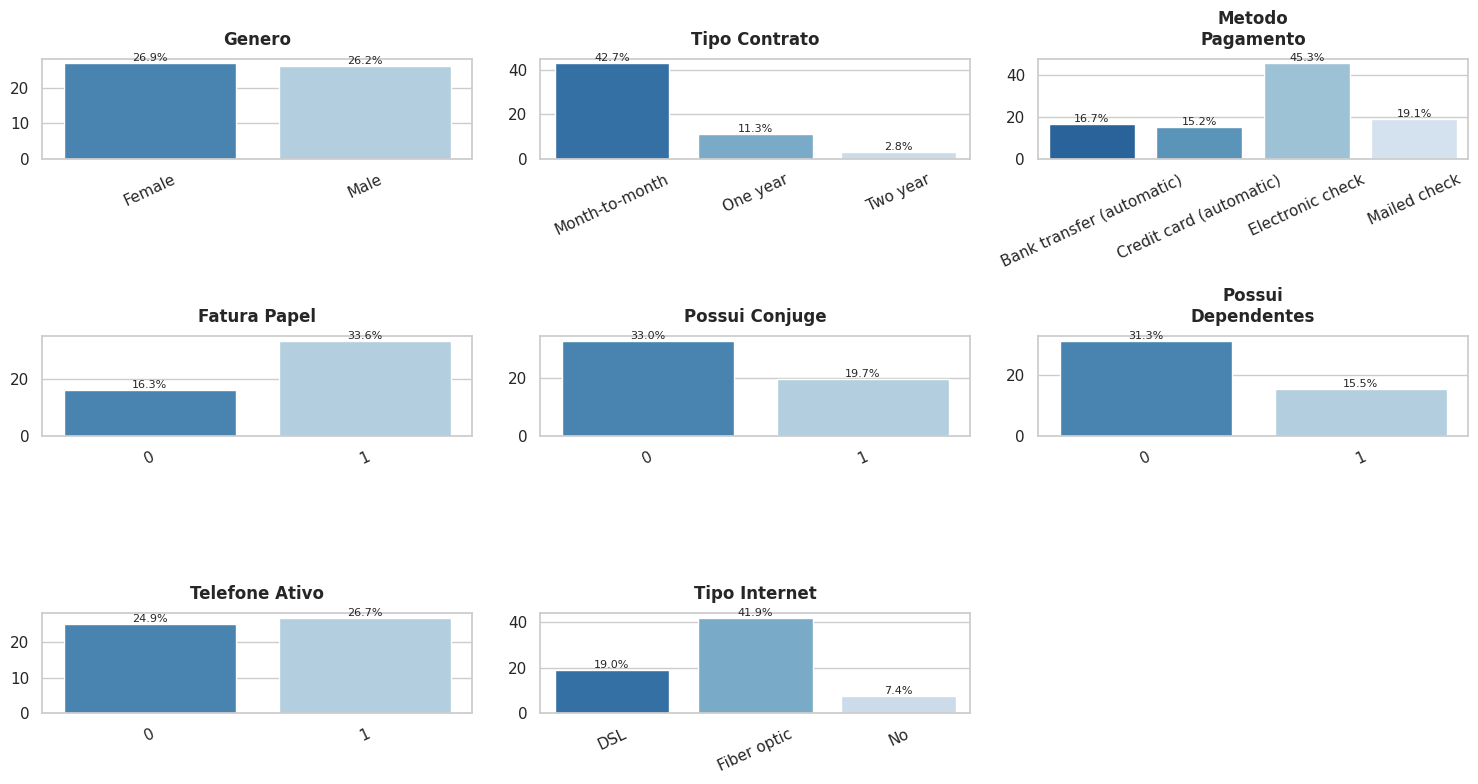

### 2.3 Evasão e Variáveis Numéricas

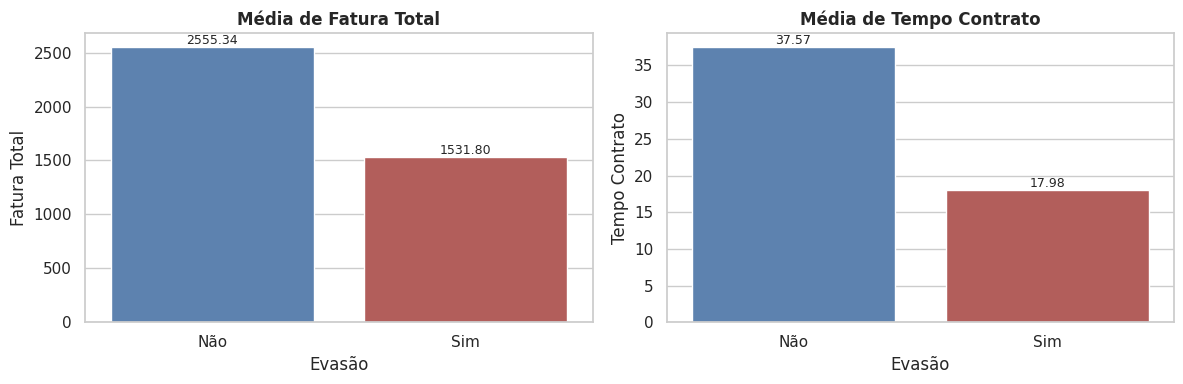


---
## 3. Conclusões e Insights

- Clientes com **contratos mensais** apresentam uma **taxa de evasão significativamente maior** que os com contratos de longo prazo.
- Determinados **métodos de pagamento** estão associados a maior evasão.
- Clientes com **menor tempo de contrato** e **menor valor total gasto** tendem a cancelar mais.
- Serviços adicionais como **segurança online** e **backup** estão relacionados a menor evasão.

Esses resultados mostram **segmentos de alto risco** que devem ser priorizados em estratégias de retenção.

---
## 4. Recomendações

1. **Incentivar contratos de longo prazo**  
   Oferecer benefícios para migração de contratos mensais para anuais ou bienais.

2. **Atuação preventiva em clientes novos**  
   Clientes com pouco tempo de contrato e baixo gasto devem receber ofertas e suporte proativo.

3. **Estimular serviços adicionais**  
   Promover pacotes com segurança online, backup e outros serviços de valor agregado.

4. **Revisar métodos de pagamento**  
   Investigar causas de evasão em determinados métodos e melhorar a experiência de cobrança.

---
Este relatório fornece **base analítica sólida** para embasar ações de retenção e redução do *Churn*.


In [ ]:
from IPython.display import display, Markdown
import math, textwrap
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# ---------------------
# Introdução
# ---------------------
display(Markdown("""
# 📊 Relatório de Análise de Evasão de Clientes (Churn)

O objetivo desta análise foi investigar o problema de **evasão de clientes** (*Churn*) em uma empresa de telecomunicações.
O *Churn* representa a porcentagem de clientes que cancelam seus serviços em determinado período.
Identificar os padrões e variáveis mais associadas à evasão é essencial para implementar **estratégias de retenção** e reduzir a perda de receita.

---
## 1. Limpeza e Tratamento de Dados
As etapas de preparação incluíram:

- **Importação** dos dados em formato JSON.
- **Remoção** de valores inconsistentes na variável-alvo `Churn` (mantendo apenas 'Yes' e 'No').
- **Criação** de uma coluna numérica `Evasao` (1 para clientes que cancelaram, 0 para clientes que permaneceram).
- **Renomeação** das colunas para nomes mais claros, alinhados ao dicionário de dados.
- **Conversão** de colunas categóricas binárias e multivalor em formato numérico (0/1).
- **Padronização** de valores para evitar `NaN` e inconsistências.

---
## 2. Análise Exploratória de Dados
Nesta etapa, buscamos identificar padrões e fatores que influenciam a evasão.
"""))

# ---------------------
# 2.1 Taxa geral de evasão
# ---------------------
taxa_evasao = df_clean['Evasao'].mean() * 100
display(Markdown(f"**Taxa geral de evasão:** {taxa_evasao:.2f}% dos clientes."))

plt.figure(figsize=(4, 4))
sns.countplot(
    data=df_clean,
    x='Evasao',
    hue='Evasao',                # para permitir uso do palette
    dodge=False,
    palette=['#4F81BD', '#C0504D'],
    legend=False
)
plt.title("Distribuição da Evasão (Churn)", fontsize=12, weight='bold')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.ylabel("Quantidade de clientes")
plt.xlabel("Evasão")
plt.show()

# ---------------------
# 2.2 Evasão por variáveis categóricas
# ---------------------
display(Markdown("### 2.2 Evasão por Variáveis Categóricas"))

variaveis_categoricas = [
    'Genero', 'Tipo_Contrato', 'Metodo_Pagamento',
    'Fatura_Papel', 'Possui_Conjuge', 'Possui_Dependentes',
    'Telefone_Ativo', 'Tipo_Internet'
]

n_cols = 3
n_rows = math.ceil(len(variaveis_categoricas) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()
plot_index = 0

for var in variaveis_categoricas:
    taxa = df_clean.groupby(var)['Evasao'].mean().reset_index()
    taxa['Evasao'] = taxa['Evasao'] * 100

    ax = sns.barplot(
        data=taxa, x=var, y='Evasao',
        hue=var, dodge=False,
        palette='Blues_r', legend=False, ax=axes[plot_index]
    )
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=8)
    titulo_formatado = "\n".join(textwrap.wrap(var.replace("_", " "), width=15))
    ax.set_title(titulo_formatado, fontsize=12, weight='bold', pad=10)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=25)
    plot_index += 1

for i in range(plot_index, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# ---------------------
# 2.3 Evasão e variáveis numéricas
# ---------------------
display(Markdown("### 2.3 Evasão e Variáveis Numéricas"))

variaveis_numericas = ['Fatura_Total', 'Tempo_Contrato']
fig, axes = plt.subplots(1, len(variaveis_numericas), figsize=(12, 4))

for i, var in enumerate(variaveis_numericas):
    media_por_evasao = df_clean.groupby('Evasao')[var].mean().reset_index()
    sns.barplot(
        data=media_por_evasao, x='Evasao', y=var,
        hue='Evasao', dodge=False,
        palette=['#4F81BD', '#C0504D'],
        legend=False, ax=axes[i]
    )
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Não', 'Sim'])
    for p in axes[i].patches:
        axes[i].annotate(f"{p.get_height():.2f}",
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=9)
    axes[i].set_title(f"Média de {var.replace('_', ' ')}", fontsize=12, weight='bold')
    axes[i].set_xlabel("Evasão")
    axes[i].set_ylabel(var.replace('_', ' '))

plt.tight_layout()
plt.show()

# ---------------------
# 3. Conclusões e Insights
# ---------------------
display(Markdown(f"""
---
## 3. Conclusões e Insights

- Clientes com **contratos mensais** apresentam uma **taxa de evasão significativamente maior** que os com contratos de longo prazo.
- Determinados **métodos de pagamento** estão associados a maior evasão.
- Clientes com **menor tempo de contrato** e **menor valor total gasto** tendem a cancelar mais.
- Serviços adicionais como **segurança online** e **backup** estão relacionados a menor evasão.

Esses resultados mostram **segmentos de alto risco** que devem ser priorizados em estratégias de retenção.

---
## 4. Recomendações

1. **Incentivar contratos de longo prazo**
   Oferecer benefícios para migração de contratos mensais para anuais ou bienais.

2. **Atuação preventiva em clientes novos**
   Clientes com pouco tempo de contrato e baixo gasto devem receber ofertas e suporte proativo.

3. **Estimular serviços adicionais**
   Promover pacotes com segurança online, backup e outros serviços de valor agregado.

4. **Revisar métodos de pagamento**
   Investigar causas de evasão em determinados métodos e melhorar a experiência de cobrança.

---
Este relatório fornece **base analítica sólida** para embasar ações de retenção e redução do *Churn*.
"""))
